# Compute potential intensity

There is a package, installable via pip - but I found this to be quite finicky, so just load the source files locally instead.
<!-- ```
conda create -n potint -y netcdf4 xarray=0.16.2 numpy numba ipykernel                           # don't add matplotlib after xarray - broke installation
conda activate potint
pip install tcpypi
```
 -->
Potential intensity for CMIP6 models can be calculated directly on JASMIN or the IPSL node

In [1]:
import xarray as xr, os, glob, re, numpy as np
from datetime import datetime
import warnings; warnings.filterwarnings("ignore", category = FutureWarning)

from tcpyPI.pi import pi
# from xclim.core.units import convert_units_to

from  IPython.display import clear_output

fpath = "/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/SEAsiaFloods/potential-intensity/era5/"
xn,xx,yn,yx = [68.5,130.5,-11.5,34.5]

In [2]:
def wrap_lon(ds):
    
    # method to wrap longitude from (0,360) to (-180,180)
    
    if "longitude" in ds.coords:
        lon = "longitude"
        lat = "latitude"
    elif "lon" in ds.coords:
        lon = "lon"
        lat = "lat"
    else: 
        # can only wrap longitude
        return ds
    
    if ds[lon].max() > 180:
        ds[lon] = (ds[lon].dims, (((ds[lon].values + 180) % 360) - 180), ds[lon].attrs)
        
    if lon in ds.dims:
        ds = ds.reindex({ lon : np.sort(ds[lon]) })
        ds = ds.reindex({ lat : np.sort(ds[lat]) })
    return ds

In [1]:
! wget https://object-store.os-api.cci2.ecmwf.int/cci2-prod-cache-1/2025-12-02/87d08372b2e55bb687f59b6eae254344.nc -O era5_pivars-q_daily-20251121.nc

--2025-12-03 09:57:50--  https://object-store.os-api.cci2.ecmwf.int/cci2-prod-cache-1/2025-12-02/87d08372b2e55bb687f59b6eae254344.nc
Resolving object-store.os-api.cci2.ecmwf.int (object-store.os-api.cci2.ecmwf.int)... 2a0c:5bc0:4c:ff::889c:8803, 136.156.136.3
connected. to object-store.os-api.cci2.ecmwf.int (object-store.os-api.cci2.ecmwf.int)|2a0c:5bc0:4c:ff::889c:8803|:443... 
HTTP request sent, awaiting response... 200 OK
Length: 21965998 (21M) [application/netcdf]
Saving to: ‘era5_pivars-q_daily-20251121.nc’

era5_pivars-q_daily 100%[===================>]  20.95M  45.9MB/s    in 0.5s    

2025-12-03 09:57:51 (45.9 MB/s) - ‘era5_pivars-q_daily-20251121.nc’ saved [21965998/21965998]



# ERA5

## Get data from CDS

### Monthly data

In [5]:
import cdsapi

target = fpath+"era5_pivars-sfc_monthly.nc"
dataset = "reanalysis-era5-single-levels-monthly-means"
request = {
    "product_type": ["monthly_averaged_reanalysis"],
    "variable": [
        "mean_sea_level_pressure",
        "sea_surface_temperature"
    ],
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980", "1981",
        "1982", "1983", "1984",
        "1985", "1986", "1987",
        "1988", "1989", "1990",
        "1991", "1992", "1993",
        "1994", "1995", "1996",
        "1997", "1998", "1999",
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007", "2008",
        "2009", "2010", "2011",
        "2012", "2013", "2014",
        "2015", "2016", "2017",
        "2018", "2019", "2020",
        "2021", "2022", "2023",
        "2024", "2025"
    ],
    "month": [
        # "01", "02", "03",
        # "04", "05", "06",
        # "07", "08", "09",
        "10", "11", "12"
    ],
    "time": ["00:00"],
    "data_format": "netcdf",
    "download_format": "unarchived",
    "area": [yx, xn, yn, xx]
}

client = cdsapi.Client()
client.retrieve(dataset, request, target)

2025-12-02 13:27:34,116 INFO Request ID is 82e71b81-fd20-4515-b0a6-734dff569f42
2025-12-02 13:27:34,186 INFO status has been updated to accepted
2025-12-02 13:27:47,715 INFO status has been updated to running
2025-12-02 13:28:49,663 INFO status has been updated to successful
                                                                                        

'/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/SEAsiaFloods/potential-intensity/era5/era5_pivars-sfc_monthly.nc'

In [6]:
import cdsapi

target = fpath+"era5_pivars-plev_monthly.nc"
dataset = "reanalysis-era5-pressure-levels-monthly-means"
request = {
    "product_type": ["monthly_averaged_reanalysis"],
    "variable": [
        "specific_humidity",
        "temperature"
    ],
    "pressure_level": [
        "1", "2", "3",
        "5", "7", "10",
        "20", "30", "50",
        "70", "100", "125",
        "150", "175", "200",
        "225", "250", "300",
        "350", "400", "450",
        "500", "550", "600",
        "650", "700", "750",
        "775", "800", "825",
        "850", "875", "900",
        "925", "950", "975",
        "1000"
    ],
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980", "1981",
        "1982", "1983", "1984",
        "1985", "1986", "1987",
        "1988", "1989", "1990",
        "1991", "1992", "1993",
        "1994", "1995", "1996",
        "1997", "1998", "1999",
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007", "2008",
        "2009", "2010", "2011",
        "2012", "2013", "2014",
        "2015", "2016", "2017",
        "2018", "2019", "2020",
        "2021", "2022", "2023",
        "2024", "2025"
    ],
    "month": [
        # "01", "02", "03",
        # "04", "05", "06",
        #"07", "08", "09",
        "10", "11", "12"
    ],
    "time": ["00:00"],
    "data_format": "netcdf",
    "download_format": "unarchived",
    "area": [yx, xn, yn, xx]
}
client = cdsapi.Client()
client.retrieve(dataset, request, target)
clear_output(wait = False)
print("Done.")

Done.


### Daily data for current month

In [ ]:
import cdsapi
y = "2025"
m = "11"

target = fpath+"era5_pivars-sfc_daily-"+y+m+".nc"
dataset = "derived-era5-single-levels-daily-statistics"
request = {
    "product_type": "reanalysis",
    "variable": [
        "mean_sea_level_pressure",
        "sea_surface_temperature"
    ],
    "year": y,
    "month": m,
    "day": [
            "01", "02", "03",
            "04", "05", "06",
            "07", "08", "09",
            "10", "11", "12",
            "13", "14", "15",
            "16", "17", "18",
            "19", "20", "21",
            "22", "23", "24",
            "25", "26", "27",
            "28", "29", "30",
            "31"
    ],
    "daily_statistic": "daily_mean",
    "time_zone": "utc+00:00",
    "frequency": "1_hourly",
    "data_format": "netcdf",
    "download_format": "unarchived",
    "area": [yx, xn, yn, xx]
}
client = cdsapi.Client()
client.retrieve(dataset, request, target)

In [ ]:
import cdsapi
y = "2025"
m = "11"
lastday = 30

dataset = "derived-era5-pressure-levels-daily-statistics"

for d in range(1,35,5):
    if d > lastday: continue
    days = days = [str(d+i).rjust(2,"0") for i in range(5) if d+i <= lastday]
    target = fpath+"era5_pivars-t_daily-"+y+m+days[0]+".nc"
    if os.path.exists(target): continue

    request = {
        "product_type": "reanalysis",
        "variable": [
            # "specific_humidity",
            "temperature"
        ],
        "year": y,
        "month": [m],
        "day": days,
        "pressure_level": [
            "1", "2", "3",
            "5", "7", "10",
            "20", "30", "50",
            "70", "100", "125",
            "150", "175", "200",
            "225", "250", "300",
            "350", "400", "450",
            "500", "550", "600",
            "650", "700", "750",
            "775", "800", "825",
            "850", "875", "900",
            "925", "950", "975",
            "1000"
        ],
        "daily_statistic": "daily_mean",
        "time_zone": "utc+00:00",
        "frequency": "1_hourly",
        "data_format": "netcdf",
        "download_format": "unarchived",
        "area": [yx, xn, yn, xx]
    }
    client = cdsapi.Client()
    client.retrieve(dataset, request, target)

2025-12-03 12:59:33,405 INFO Request ID is 51b1eed3-9cea-44eb-a25f-7e996624d99b
2025-12-03 12:59:33,478 INFO status has been updated to accepted


## Merge & prep files

nb. Data only up to November 26th

In [13]:
# load daily data & resample to monthly
sfc_d = xr.open_dataset(fpath+"era5_pivars-sfc_daily-202511.nc")
sfc_d = sfc_d.resample(valid_time = "MS").mean()

plev_d = xr.merge([xr.open_mfdataset(fpath+"era5_pivars-q_daily*.nc"), xr.open_mfdataset(fpath+"era5_pivars-t_daily*.nc")])
plev_d = plev_d.resample(valid_time = "MS").mean()

In [17]:
# load monthly data
plev_m = xr.open_mfdataset(fpath+"era5_pivars-plev_monthly.nc").reset_coords("expver", drop = True)
sfc_m = xr.open_mfdataset(fpath+"era5_pivars-sfc_monthly.nc").reset_coords("expver", drop = True)

In [ ]:
# merge & concatenate into a single ds
ds = xr.merge([xr.concat([plev_m, plev_d], "valid_time"), xr.concat([sfc_m, sfc_d], "valid_time")])

# clean & relabel dims
ds = ds.rename(latitude = "lat", longitude = "lon", valid_time = "time", pressure_level = "p").reset_coords(drop = True)

# convert units
ds["q"] = (ds.q*100).assign_attrs(units = "g/kg")
ds["t"] = (ds.t - 273.15).assign_attrs(units = "degC")
ds["msl"] = (ds.msl / 100).assign_attrs(units = "hPa")
ds["sst"] = (ds.sst - 273.15).assign_attrs(units = "degC")

In [ ]:
# save as a single file
ds.to_netcdf(fpath+"era5_pivars-monthly.nc")

# Compute PI

_Crashes when attempting to compute for whole DS, so chunk into years & compute separately_

In [3]:
ds = xr.open_dataset(fpath+"era5_pivars-monthly.nc")

In [4]:
# calculate the potential intensity
vmax, pmin, ifl, t0, otl = xr.apply_ufunc(
    pi,
    ds['sst'], ds['msl'], ds['p'], ds['t'], ds['q'],
    kwargs=dict(CKCD=0.9, ascent_flag=0, diss_flag=1, ptop=50, miss_handle=1),  # used default value of CKCD = 0.9
    input_core_dims=[
        [], [], ['p', ], ['p', ], ['p', ],
    ],
    output_core_dims=[
        [], [], [], [], []
    ],
    vectorize=True
)

In [ ]:
vmax = vmax.rename("vmax")
vmax.to_netcdf(fpath+"era5_pi.nc")

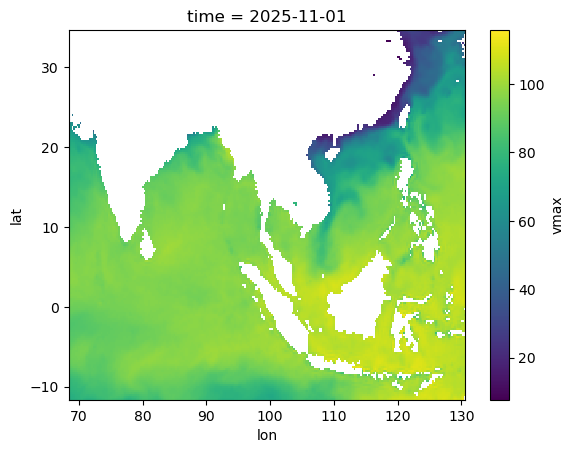

In [7]:
vmax.isel(time = -1).plot() # check that there is actually data

---
# Earlier versions of code (needed to work with larger regions)

## Monthly potential intensity

### Prep regional files

In [ ]:
q = xr.open_dataset(fpath+"era5_q-plev_monthly.nc").reset_coords(drop = True).sel(longitude = slice(xn,xx), latitude = slice(yx,yn))
q = q.rename(latitude = "lat", longitude = "lon", valid_time = "time", pressure_level = "p").q
q = (q*100).assign_attrs(units = "g/kq")
q.to_netcdf(fpath+"era5_q_monthly.nc")

In [5]:
t = xr.open_dataset(fpath+"era5_t-plev_monthly.nc").reset_coords(drop = True).sel(longitude = slice(xn,xx), latitude = slice(yx,yn))
t = t.rename(latitude = "lat", longitude = "lon", valid_time = "time", pressure_level = "p").t
t = (t - 273.15).assign_attrs(units = "degC")
t.to_netcdf(fpath+"era5_t_monthly.nc")

In [3]:
sfc = xr.open_dataset(fpath+"era5_pivars-sfc_monthly.nc").reset_coords(drop = True).sel(longitude = slice(xn,xx), latitude = slice(yx,yn))
sfc = sfc.rename(latitude = "lat", longitude = "lon", valid_time = "time")
sfc = sfc.sel(time = sfc.time.dt.month.isin([10,11,12]))

msl = (sfc.msl / 100).assign_attrs(units = "hPa")
msl.to_netcdf(fpath+"era5_msl_monthly.nc")

sst = (sfc.sst - 273.15).assign_attrs(units = "degC")
sst.to_netcdf(fpath+"era5_sst_monthly.nc")

### Compile & compute


Kernel keeps crashing so use CDO -  
`cdo merge $fpath/*melissa.nc $fpath/pivars-melissa_era5_monthly.nc`

In [ ]:
ds = xr.open_dataset(fpath+"/pivars_era5_monthly.nc")

In [6]:
! mkdir -p $fpath/pi-peryear

In [7]:
# start by extracting single years of data
for y in sorted(list(set(ds.time.dt.strftime("%Y").values))):
    
    new_fnm = fpath+"pi-peryear/pi-vars_era5_monthly_"+str(y)+".nc"
    print(new_fnm)
    if os.path.exists(new_fnm): continue
    
    ds.sel(time = str(y)).to_netcdf(new_fnm)
clear_output(wait = False)

In [ ]:
# then compute the PI (otherwise large file size slows everything down)
for fnm in glob.glob(fpath+"pi-peryear/pi-vars_*.nc"):
    
    print(fnm)
    new_fnm = re.sub("pi-vars", "pi", fnm)
    if os.path.exists(new_fnm): continue
        
    ds = xr.open_dataset(fnm)
    # calculate the potential intensity
    vmax, pmin, ifl, t0, otl = xr.apply_ufunc(
        pi,
        ds['sst'], ds['msl'], ds['p'], ds['t'], ds['q'],
        kwargs=dict(CKCD=0.9, ascent_flag=0, diss_flag=1, ptop=50, miss_handle=1),  # used default value of CKCD = 0.9
        input_core_dims=[
            [], [], ['p', ], ['p', ], ['p', ],
        ],
        output_core_dims=[
            [], [], [], [], []
        ],
        vectorize=True
    )
    vmax = vmax.rename("vmax")
    vmax.to_netcdf(new_fnm)
clear_output(wait = False)
print("Done.")

## Daily PI for current month

### Compile & convert variables for current month


In [ ]:
msl = xr.open_dataset(fpath+"mean_sea_level_pressure_stream-oper_daily-mean.nc")
sst = xr.open_dataset(fpath+"sea_surface_temperature_0_daily-mean.nc")

In [5]:
sfc_m = xr.open_dataset(fpath+"era5_pi-t_monthly-10.nc")

In [ ]:
! wget https://object-store.os-api.cci2.ecmwf.int/cci2-prod-cache-1/2025-10-30/b38ac087e81bc59191c8d456de21d2ed.zip -O $fpath/tmp.zip
! cd $fpath; unzip tmp.zip

In [ ]:
q = xr.open_mfdataset(fpath+"era5_pivars-q_daily-*.nc").q
t = xr.open_mfdataset(fpath+"era5_pivars-t_daily-*.nc").t

q2 = xr.open_dataset(fpath+"zera5_pivars-q_daily-20251020.nc").q.sel(valid_time = slice(q.valid_time.max()+1, None))
t2 = xr.open_dataset(fpath+"zera5_pivars-t_daily-20251020.nc").t.sel(valid_time = slice(t.valid_time.max()+1, None))

qq = xr.concat([q, q2], "valid_time")
tt = xr.concat([t, t2], "valid_time")

In [ ]:
# merge to one dataset
ds = xr.merge([qq,tt,msl,sst]).reset_coords(drop = True).rename(latitude = "lat", longitude = "lon", valid_time = "time", pressure_level = "p")

# convert units
ds["q"] = (ds.q*100).assign_attrs(units = "g/kq")
ds["t"] = (ds.t - 273.15).assign_attrs(units = "degC")
ds["msl"] = (ds.msl / 100).assign_attrs(units = "hPa")
ds["sst"] = (ds.sst - 273.15).assign_attrs(units = "degC")

ds.to_netcdf(fpath+"pi-peryear/pi-vars_era5_daily_2025-10.nc")

### Compute PI

In [ ]:
# from daily variables
ds = xr.open_dataset(fpath+"pi-peryear/pi-vars_era5_daily_2025-10.nc")
vmax, pmin, ifl, t0, otl = xr.apply_ufunc(
    pi,
    ds['sst'], ds['msl'], ds['p'], ds['t'], ds['q'],
    kwargs=dict(CKCD=0.9, ascent_flag=0, diss_flag=1, ptop=50, miss_handle=1),  # used default value of CKCD = 0.9
    input_core_dims=[
        [], [], ['p', ], ['p', ], ['p', ],
    ],
    output_core_dims=[
        [], [], [], [], []
    ],
    vectorize=True
)
vmax.rename("vmax").to_netcdf(fpath+"pi-peryear/pi_era5_daily_2025-10.nc")

In [ ]:
# from monthly mean
ds = xr.open_dataset(fpath+"pi-peryear/pi-vars_era5_daily_2025-10.nc").resample(time = "MS").mean()
vmax, pmin, ifl, t0, otl = xr.apply_ufunc(
    pi,
    ds['sst'], ds['msl'], ds['p'], ds['t'], ds['q'],
    kwargs=dict(CKCD=0.9, ascent_flag=0, diss_flag=1, ptop=50, miss_handle=1),  # used default value of CKCD = 0.9
    input_core_dims=[
        [], [], ['p', ], ['p', ], ['p', ],
    ],
    output_core_dims=[
        [], [], [], [], []
    ],
    vectorize=True
)
vmax.to_netcdf(fpath+"pi-peryear/pi_era5_monthly_2025-10.nc")

## Compile history + current month

In [ ]:
# now recompile to a single file
pi = xr.open_mfdataset(fpath+"pi-peryear/pi_era5_monthly_*.nc").rename({"__xarray_dataarray_variable__" : "vmax"})
pi.to_netcdf("/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/hurricane-melissa/potential-intensity/pi-era5.nc")

In [ ]:
pivars = xr.open_mfdataset(fpath+"pi-peryear/pi-vars_era5_monthly_*.nc")
pivars_daily = xr.open_dataset(fpath+"pi-peryear/pi-vars_era5_daily_2025-10.nc")
pivars = xr.concat([pivars, pivars_daily.resample(time = "MS").mean()], "time")
pivars.to_netcdf("/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/hurricane-melissa/potential-intensity/pivars-era5.nc")

### Daily potential intensity

In [10]:
ds = xr.merge([xr.open_mfdataset(fpath+"era5_pi-plev_*daily.nc"), 
               xr.open_mfdataset(fpath+"era5_pi-sfc_*daily.nc")])

ds = ds.rename(pressure_level = "p", latitude = "lat", longitude = "lon", valid_time = "time")[["msl", "t", "q", "sst"]]

ds["msl"] = convert_units_to(ds.msl, "hPa")
ds["sst"] = convert_units_to(ds.sst, "degC")
ds["t"] = convert_units_to(ds.t, "degC")
ds["q"] = convert_units_to(ds.q, "g kg-1")
ds["p"] = convert_units_to(ds.p, "hPa")

ds.to_netcdf(fpath+"pi-vars_era5_daily.nc")

In [12]:
xr.open_dataset(fpath+"era5_pi-plev_2024-11_daily.nc")

<xarray.Dataset>
Dimensions:         (valid_time: 27, pressure_level: 37, latitude: 161,
                     longitude: 181)
Coordinates:
  * pressure_level  (pressure_level) float64 1e+03 975.0 950.0 ... 3.0 2.0 1.0
  * latitude        (latitude) float64 40.0 39.75 39.5 39.25 ... 0.5 0.25 0.0
  * longitude       (longitude) float64 100.0 100.2 100.5 ... 144.5 144.8 145.0
  * valid_time      (valid_time) datetime64[ns] 2024-11-01 ... 2024-11-27
Data variables:
    q               (valid_time, pressure_level, latitude, longitude) float32 ...
    t               (valid_time, pressure_level, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-02T14:58 GRIB to CDM+CF via cfgrib-0.9.1...

In [24]:
# start by extracting single days of data
for d in sorted(list(set(ds.time.dt.strftime("%Y-%m-%d").values))):
    
    new_fnm = fpath+"pi-hourly/pi-vars_era5_hourly_"+d+".nc"
    print(new_fnm)
    if os.path.exists(new_fnm): continue
    
    ds.sel(time = d).to_netcdf(new_fnm)

In [24]:
# then compute the PI (otherwise large file size slows everything down)
for fnm in glob.glob(fpath+"pi-hourly/pi-vars_*.nc"):
    
    new_fnm = re.sub("pi-vars", "pi", fnm)
    if os.path.exists(new_fnm): continue
        
    ds = xr.open_dataset(fnm)
    # calculate the potential intensity
    vmax, pmin, ifl, t0, otl = xr.apply_ufunc(
        pi,
        ds['sst'], ds['msl'], ds['p'], ds['t'], ds['q'],
        kwargs=dict(CKCD=0.9, ascent_flag=0, diss_flag=1, ptop=50, miss_handle=1),  # used default value of CKCD = 0.9
        input_core_dims=[
            [], [], ['p', ], ['p', ], ['p', ],
        ],
        output_core_dims=[
            [], [], [], [], []
        ],
        vectorize=True
    )
    vmax.to_netcdf(new_fnm)
clear_output(wait = False)
print("Done.")

## Monthly potential intensity from daily data

In [12]:
ds = xr.merge([xr.concat([wrap_lon(xr.open_dataset(fnm)) for fnm in glob.glob(fpath+"era5_pi-plev_*daily.nc")], "valid_time"), 
               xr.concat([wrap_lon(xr.open_dataset(fnm)) for fnm in glob.glob(fpath+"era5_pi-sfc_*daily.nc")], "valid_time")]).resample(valid_time = "MS").mean().load()

ds = ds.rename(pressure_level = "p", latitude = "lat", longitude = "lon", valid_time = "time")[["msl", "t", "q", "sst"]]

ds["msl"] = convert_units_to(ds.msl, "hPa")
ds["sst"] = convert_units_to(ds.sst, "degC")
ds["t"] = convert_units_to(ds.t, "degC")
ds["q"] = convert_units_to(ds.q, "g kg-1")
ds["p"] = convert_units_to(ds.p, "hPa")

# calculate the potential intensity
vmax, pmin, ifl, t0, otl = xr.apply_ufunc(
    pi,
    ds['sst'], ds['msl'], ds['p'], ds['t'], ds['q'],
    kwargs=dict(CKCD=0.9, ascent_flag=0, diss_flag=1, ptop=50, miss_handle=1),  # used default value of CKCD = 0.9
    input_core_dims=[
        [], [], ['p', ], ['p', ], ['p', ],
    ],
    output_core_dims=[
        [], [], [], [], []
    ],
    vectorize=True
)

In [13]:
vmax.to_netcdf("/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/pi_philippines/pi_era5_monthly-from-hourly.nc")

# MERRA-2 (2024 only)

In [49]:
ds = xr.merge([xr.open_mfdataset("/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/pi_philippines/merra2_2024/*"+domain+"*") for domain in ["Nx", "Np"]]).load()

ds = ds.rename(lev = "p", QV = "q", T = "t", TS = "sst", SLP = "msl")        
ds["msl"] = convert_units_to(ds.msl, "hPa")
ds["sst"] = convert_units_to(ds.sst, "degC")
ds["t"] = convert_units_to(ds.t, "degC")
ds["q"] = convert_units_to(ds.q, "g kg-1")
ds["p"] = convert_units_to(ds.p, "hPa")

In [50]:
# calculate the potential intensity
vmax, pmin, ifl, t0, otl = xr.apply_ufunc(
    pi,
    ds['sst'], ds['msl'], ds['p'], ds['t'], ds['q'],
    kwargs=dict(CKCD=0.9, ascent_flag=0, diss_flag=1, ptop=50, miss_handle=1),  # used default value of CKCD = 0.9
    input_core_dims=[
        [], [], ['p', ], ['p', ], ['p', ],
    ],
    output_core_dims=[
        [], [], [], [], []
    ],
    vectorize=True
)
vmax.to_netcdf("/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/pi_philippines/pi_merra2_monthly_2024.nc")

In [51]:
ds = xr.open_dataset("/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/pi_philippines/pi_merra2_monthly_2024.nc")

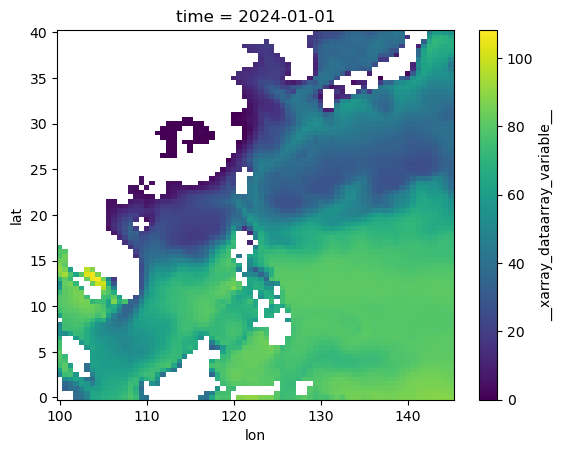

In [56]:
ds["__xarray_dataarray_variable__"].isel(time = 0).plot()